## L1 Models Prediction Observation

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [32]:
def compute_rmse(actual, predicted):
    return np.sqrt(((actual - predicted) ** 2).mean())

def compute_mape(actual, predicted):
    return 100 * np.mean(np.abs((actual - predicted) / actual))

In [33]:
# Define the data file
IS_FILTERED = True

# Import the data
datafile = 'prediction_result_filtered.csv' if IS_FILTERED else 'prediction_result.csv'
df = pd.read_csv('../source/l1_prediction_dataset/' + datafile)
df['Time'] = pd.to_datetime(df['Time'])
df['FormattedTime'] = df['Time'].dt.strftime('%H:%M:%S')
df = df.sort_values(by='FormattedTime')

# Indicate which columns to ignore
IGNORED_COLS = ['Time', 'FormattedTime', 'Actual'] 
if IS_FILTERED: IGNORED_COLS.append('Raw')

In [34]:
# Compute RMSE and MAPE for each model
for column in df.columns:
    if column not in IGNORED_COLS:
        actual = df['Raw'] if IS_FILTERED else df['Actual']
        rmse = compute_rmse(actual, df[column])
        mape = compute_mape(actual, df[column])
        print(f"{column} - RMSE: {rmse:.4f}, MAPE: {mape:.2f}%")

ARIMA - RMSE: 0.0376, MAPE: 23.02%
ETS - RMSE: 0.0421, MAPE: 25.25%
LSTM - RMSE: 0.0343, MAPE: 21.91%


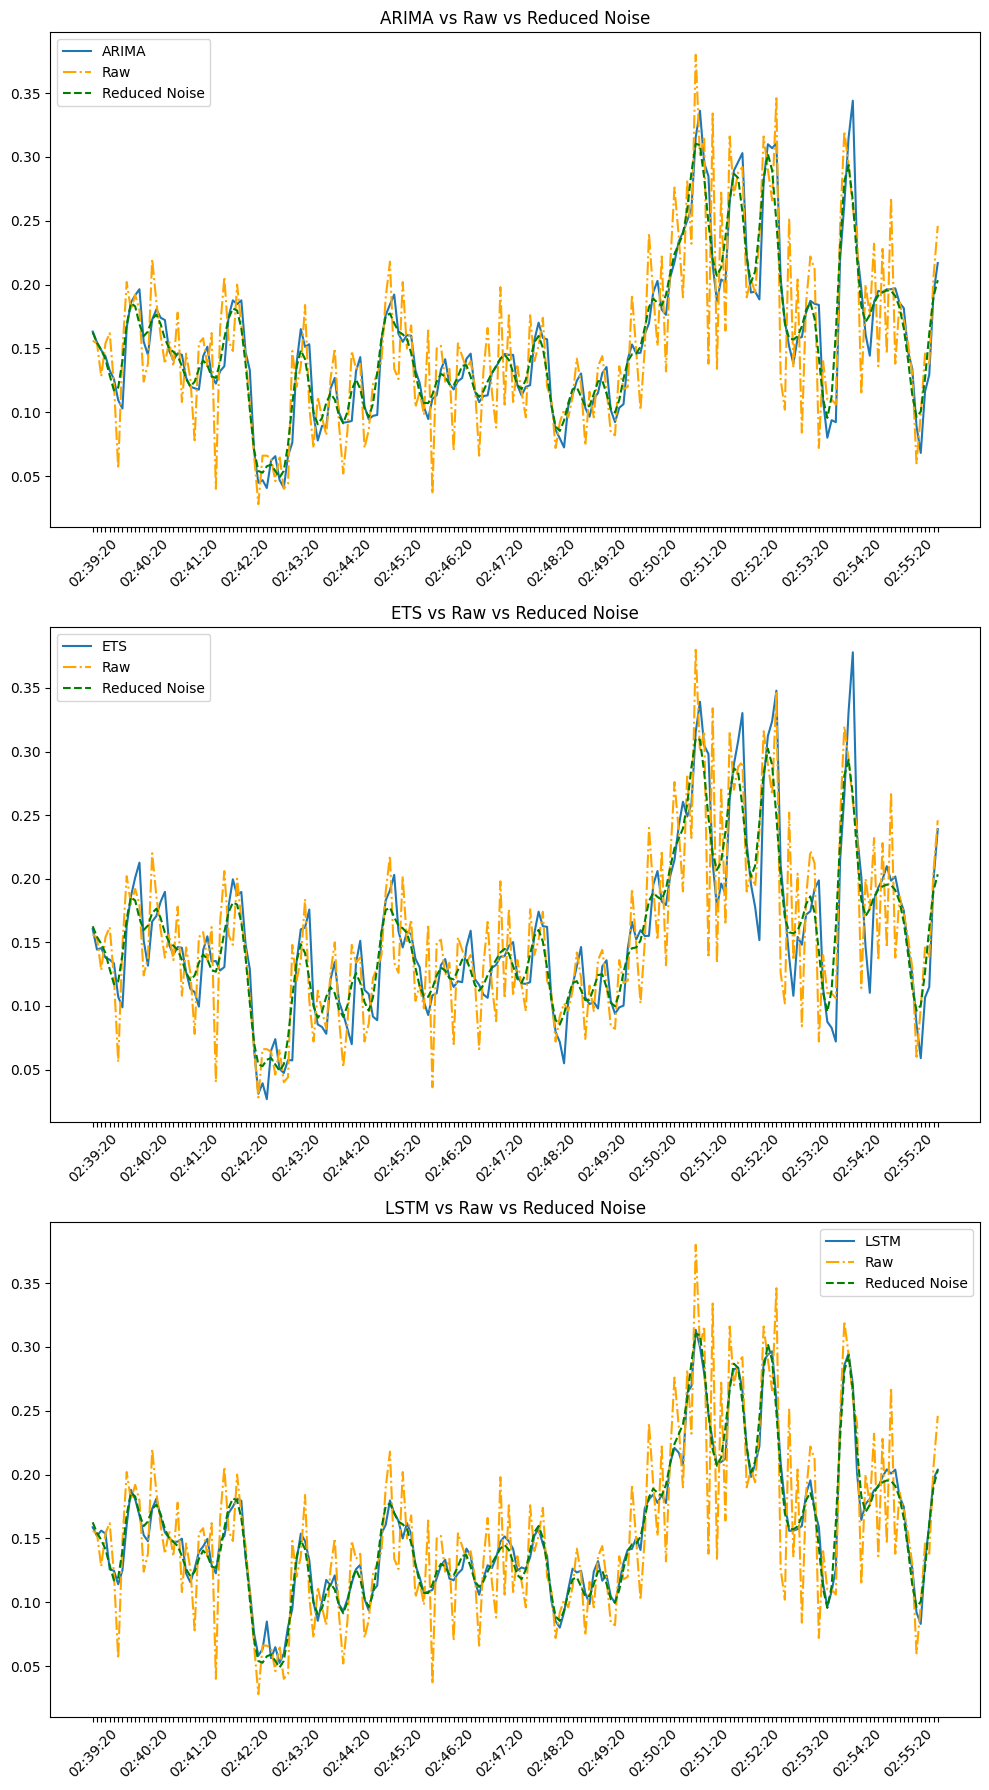

In [35]:
# Plot the data
fig, axes = plt.subplots(
    nrows=len(df.columns) - len(IGNORED_COLS), 
    figsize=(10, 6 * (len(df.columns) - len(IGNORED_COLS)))
    )

# Ensure axes is always a list or array
if not isinstance(axes, np.ndarray):
    axes = [axes]

ax_idx = 0  # Separate index for accessing axes

for column in df.columns:
    if column not in IGNORED_COLS:
        actual_label = 'Reduced Noise' if IS_FILTERED else 'Raw'
        actual_color = 'green' if IS_FILTERED else 'orange'
        axes[ax_idx].plot(df['FormattedTime'], df[column], label=column)
        if IS_FILTERED: axes[ax_idx].plot(df['FormattedTime'], df['Raw'], label='Raw', linestyle='-.', color='orange')  # Added this line to plot the Raw values
        axes[ax_idx].plot(df['FormattedTime'], df['Actual'], label=actual_label, linestyle='--', color=actual_color)

        # Sparse Tick Labels logic
        n = 12  # Display every n-th label 
        for index, label in enumerate(axes[ax_idx].xaxis.get_ticklabels()):
            if index % n != 0:
                label.set_visible(False)

        # Rotate the visible x-axis labels
        axes[ax_idx].tick_params(axis='x', rotation=45)

        axes[ax_idx].legend()
        # axes[ax_idx].grid(True) # Uncomment this line to show grid lines
        title = f'{column} vs Raw'
        if IS_FILTERED: title += ' vs Reduced Noise'
        axes[ax_idx].set_title(title)
        ax_idx += 1  # Increment ax_idx

plt.tight_layout()
plt.show()